# Car Price Pradiction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("CarPrice_Assignment.csv")

# Data Analysis

In [3]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
df.isnull()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
201,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
202,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
203,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [7]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [8]:
df.corr()

C:\Users\KARAN\AppData\Local\Temp\ipykernel_8036\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


In [9]:
import seaborn as sns

C:\Users\KARAN\AppData\Local\Temp\ipykernel_8036\3233941573.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


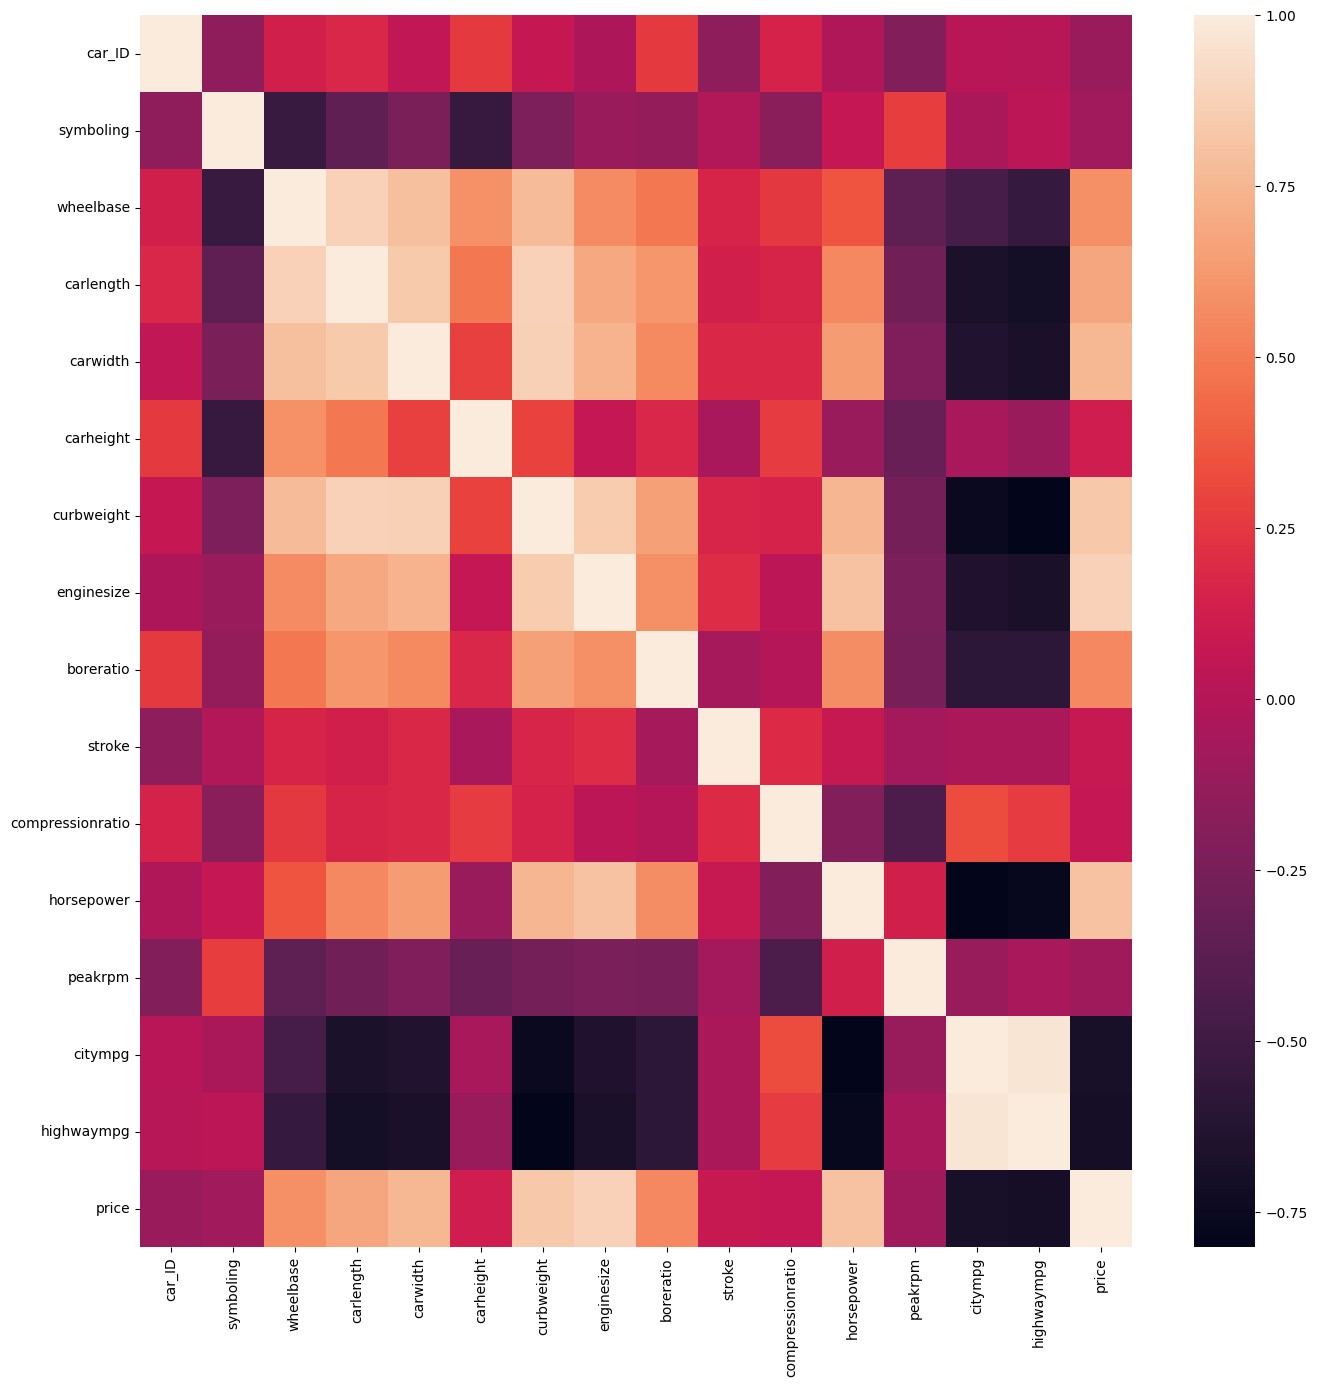

In [10]:
plt.figure(figsize=(16,16))
sns.heatmap(df.corr())
plt.show()

# Data Visulaztion

In [11]:
df.CarName.describe()

count               205
unique              147
top       toyota corona
freq                  6
Name: CarName, dtype: object

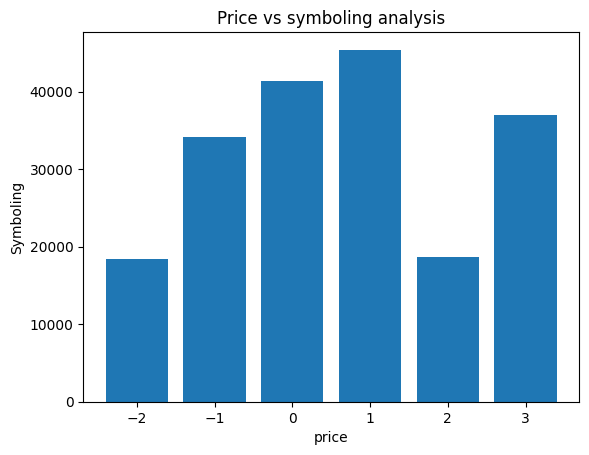

In [12]:
plt.bar(df.symboling,df.price)
plt.title("Price vs symboling analysis")
plt.xlabel("price")
plt.ylabel("Symboling")
plt.show()

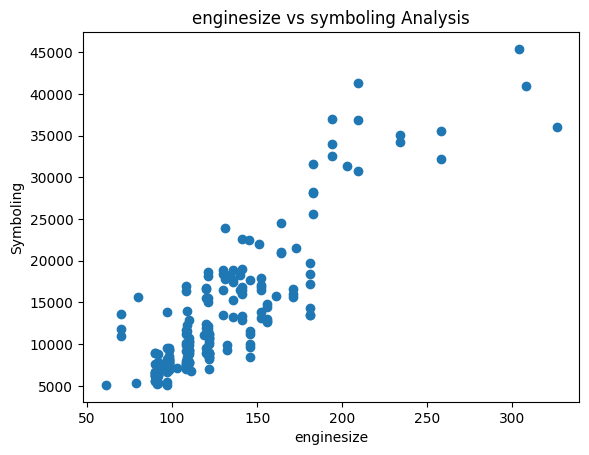

In [13]:
plt.scatter(df.enginesize,df.price)
plt.title("enginesize vs symboling Analysis")
plt.xlabel("enginesize")
plt.ylabel("Symboling")
plt.show()

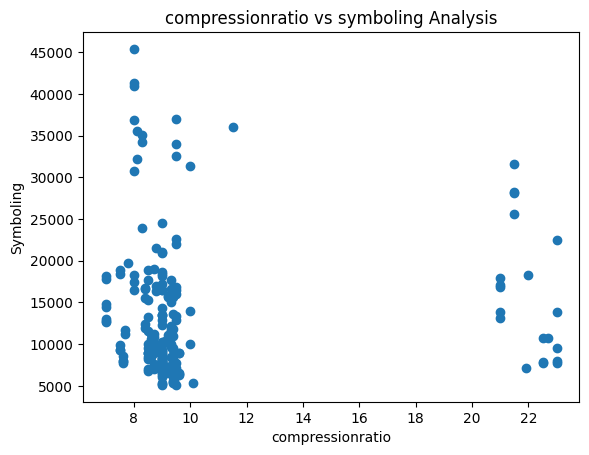

In [14]:
plt.scatter(df.compressionratio,df.price)
plt.title("compressionratio vs symboling Analysis")
plt.xlabel("compressionratio")
plt.ylabel("Symboling")
plt.show()

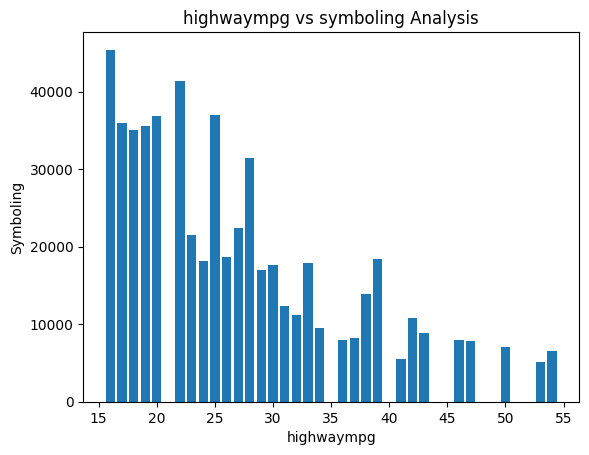

In [15]:
plt.bar(df.highwaympg,df.price)
plt.title("highwaympg vs symboling Analysis")
plt.xlabel("highwaympg")
plt.ylabel("Symboling")
plt.show()

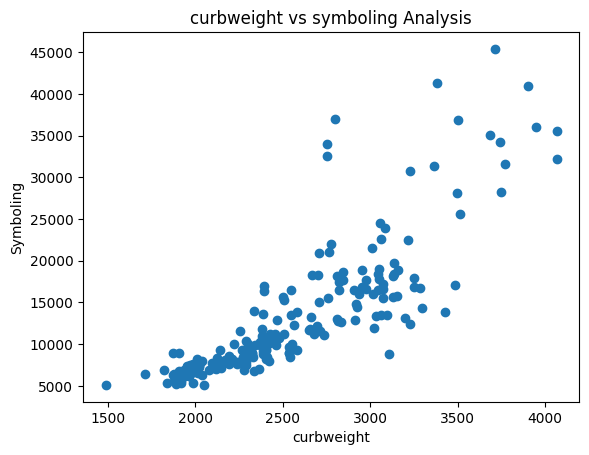

In [16]:
plt.scatter(df.curbweight,df.price)
plt.title("curbweight vs symboling Analysis")
plt.xlabel("curbweight")
plt.ylabel("Symboling")
plt.show()

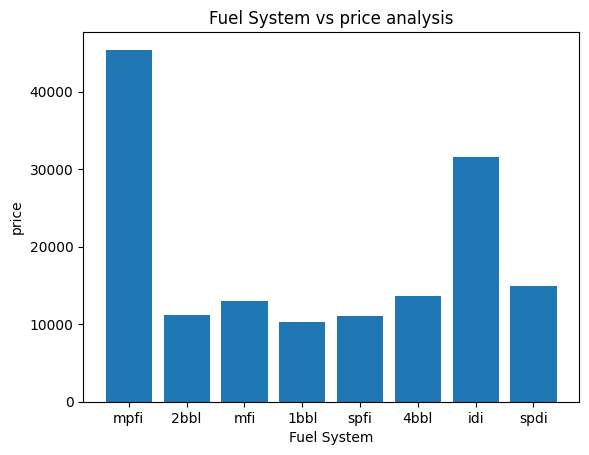

In [17]:
plt.bar(df.fuelsystem,df.price)
plt.title("Fuel System vs price analysis")
plt.xlabel("Fuel System")
plt.ylabel("price")
plt.show()

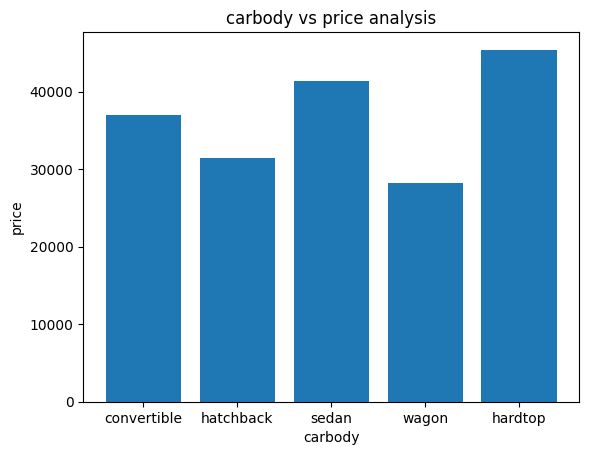

In [18]:
plt.bar(df.carbody,df.price)
plt.title("carbody vs price analysis")
plt.xlabel("carbody")
plt.ylabel("price")
plt.show()

Text(0, 0.5, 'Price')

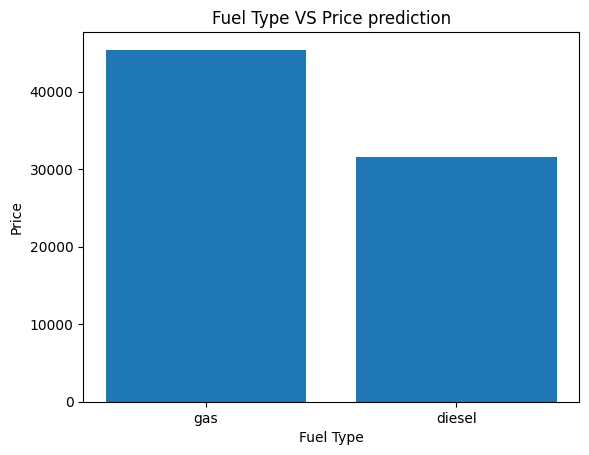

In [19]:
plt.bar(df.fueltype,df.price)
plt.title("Fuel Type VS Price prediction")
plt.xlabel("Fuel Type")
plt.ylabel("Price")

# Machine Learning Model

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

In [21]:
enc=LabelEncoder()
model=LinearRegression()

In [22]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [23]:
df.CarName=enc.fit_transform(df.CarName)
df.fueltype=enc.fit_transform(df.fueltype)
df.aspiration=enc.fit_transform(df.aspiration)
df.doornumber=enc.fit_transform(df.doornumber)
df.carbody=enc.fit_transform(df.carbody)
df.drivewheel=enc.fit_transform(df.drivewheel)
df.enginelocation=enc.fit_transform(df.enginelocation)
df.fuelsystem=enc.fit_transform(df.fuelsystem)
df.enginetype=enc.fit_transform(df.enginetype)
df.cylindernumber=enc.fit_transform(df.cylindernumber)

In [24]:
x=df.drop("price",axis=1)
y=df["price"]

In [25]:
df.head(100)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,2,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,3,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,1,1,0,1,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,4,1,0,0,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,5,1,0,0,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,1,74,1,0,1,2,1,0,94.5,...,97,1,3.15,3.29,9.4,69,5200,31,37,7799.0
96,97,1,76,1,0,0,3,1,0,94.5,...,97,1,3.15,3.29,9.4,69,5200,31,37,7499.0
97,98,1,78,1,0,0,4,1,0,94.5,...,97,1,3.15,3.29,9.4,69,5200,31,37,7999.0
98,99,2,70,1,0,1,1,1,0,95.1,...,97,1,3.15,3.29,9.4,69,5200,31,37,8249.0


In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=30)

In [28]:
model.fit(x_train,y_train)

LinearRegression()

In [29]:
pred=model.predict(x_test)

In [30]:
pred

array([ 5153.56186459,  9811.0064926 ,  7522.46997179, 11324.36186273,
       29995.91898964, 20454.86776128,  7090.29870531,  7838.66700333,
        4582.50302399,  8523.73163949,  9528.15703737,  6871.75860653,
       20854.01609939, 16045.04142536,  9124.18506123,  6678.26422031,
        8682.02870842,  8772.55463123, 10334.90176675,  7992.09876379,
        8142.13811993, 11420.58020969, 10021.57184928, 21346.34388224,
       21582.00342116, 13297.00366618, 10486.25346893,  5569.05841573,
       19939.71274854, 14163.4716462 , 11644.63178388, 29801.27124923,
        6110.94871431,  6838.33285679,  9343.30834742, 10691.6042587 ,
        6036.27505022,  9424.18553575, 13320.7823235 , 29781.56472169,
        6995.57804279, 16653.12028459, 19384.51833057,  5230.48500232,
       11094.76883042, 11411.32483793, 17748.22305201, 15116.67781476,
        6747.97428668, 18886.31686086,  9175.12565707, 32324.39355125,
       16698.18282306,  6019.46516392, 26987.11649742, 35157.63892439,
      

In [31]:
y_test

121     6692.0
176    10898.0
24      6229.0
88      9279.0
72     35056.0
        ...   
94      7299.0
3      13950.0
172    17669.0
179    15998.0
198    18420.0
Name: price, Length: 62, dtype: float64

In [32]:
model.score(x_train,y_train)

0.9053766661029805

In [33]:
model.score(x_test,y_test)

0.8664350667582623